In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df=pd.read_csv("C:\\Users\\subba\\OneDrive\\Desktop\\Mini_project\\train_genetic_disorders.csv")
df2=df 
df3=df.copy()

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [17]:
df2['Patient Age'].value_counts()

12.0    1374
4.0     1367
9.0     1336
13.0    1334
2.0     1329
5.0     1324
0.0     1320
3.0     1311
6.0     1310
1.0     1299
8.0     1286
7.0     1278
11.0    1275
14.0    1264
10.0    1236
Name: Patient Age, dtype: int64

In [18]:
df2['Paternal gene']

0         No
1         No
2         No
3         No
4        Yes
        ... 
22078    NaN
22079    NaN
22080    NaN
22081    NaN
22082    NaN
Name: Paternal gene, Length: 22083, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [20]:
df.head(20)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,...,Singular,9.836351,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [21]:
df2.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [22]:
'''
UNWANTED COILUMNS:-
1.PATIENT ID
2.MOTHER NAME
3.FATHER NAME
4.FAMILY NAME
5.Institute Name
6.Location of Institute  
7.Heart Rate (rates/min
8.Parental consent

'''

'\nUNWANTED COILUMNS:-\n1.PATIENT ID\n2.MOTHER NAME\n3.FATHER NAME\n4.FAMILY NAME\n5.Institute Name\n6.Location of Institute  \n7.Heart Rate (rates/min\n8.Parental consent\n\n'

In [23]:
pd.factorize(df2['Family Name'])

(array([-1, -1, -1, ..., -1, -1, -1], dtype=int64),
 Index(['Hoelscher', 'Stutzman', 'Bryant', 'Camacho', 'Sandoval', 'Harness',
        'Homza', 'Hasan', 'Whipple', 'Canada',
        ...
        'Nwachukwu', 'Gammon', 'Byington', 'Delrio', 'Sagredo', 'Helton',
        'Gills', 'Kwok', 'Brumback', 'Frascone'],
       dtype='object', length=6051))

In [24]:
df2["Genetic Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [25]:
df2["Disorder Subclass"].value_counts()

Leigh syndrome                         4893
Mitochondrial myopathy                 4202
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1743
Hemochromatosis                        1291
Leber's hereditary optic neuropathy     607
Alzheimer's                             148
Cancer                                   92
Name: Disorder Subclass, dtype: int64

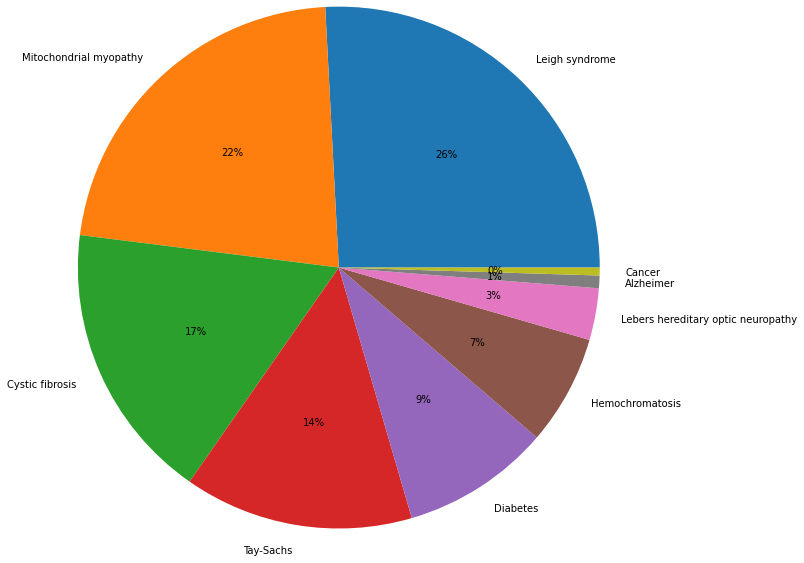

In [26]:
plt.pie(df2["Disorder Subclass"].value_counts(), autopct='%.0f%%',radius=3,labels=[
'Leigh syndrome',
'Mitochondrial myopathy',
'Cystic fibrosis',                        
'Tay-Sachs',                              
'Diabetes',                               
'Hemochromatosis',                        
'Lebers hereditary optic neuropathy',     
'Alzheimer',                           
'Cancer'])
plt.show()

In [27]:
#df2.drop(columns='Patient Id',axis=0,inplace=True)

In [69]:
df3=df[['Patient Age','Blood cell count (mcL)','No. of previous abortion','White Blood cell count (thousand per microliter)']]

In [70]:
df3.head(3)

,Patient Age,Blood cell count (mcL),No. of previous abortion,White Blood cell count (thousand per microliter)
0,2.0,4.760603,NaN,9.857562
1,4.0,4.910669,NaN,5.522560
2,6.0,4.893297,4.0,NaN


# IDEA FOR FILLING ALL NULL VALUES OF COL 13 AND 14

In [71]:
df3=df[['Genetic Disorder','Disorder Subclass']]
df3.head(12)

,Genetic Disorder,Disorder Subclass
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,NaN,Cystic fibrosis
2,Multifactorial genetic inheritance disorders,Diabetes
3,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Multifactorial genetic inheritance disorders,Cancer
5,Single-gene inheritance diseases,Cystic fibrosis
6,Single-gene inheritance diseases,Tay-Sachs
7,Single-gene inheritance diseases,Tay-Sachs
8,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,Multifactorial genetic inheritance disorders,Diabetes


# Doubts

1.what parameters must be taken

(solution---see the correlation)

In [31]:
df2['Symptom 4'].value_counts()

0.0    9543
1.0    9444
Name: Symptom 4, dtype: int64

# NOTES

1-->Status coloumn can be used to classify very dangerous disoeder(it has only 2 values(alive)(deceased)) and considering at which age does it mostly occur!

2--> the column Respiratory Rate (breaths/min) can also be shown as side effect for some catogiries of the gentic disorders

3-->Parental consent col can be used to create awareness among the people,wheteher they know about the tests and process or not

4--> use the gender column only for statistics purpose and ignore the nulll values! **(verify your result with google)

5-->Birth asphyxia is also col used for statistics purpose

6-->Autopsy shows birth defect (if applicable) col used for statistics 



### Removing missing values of paerental consent col

In [32]:
df2['Parental consent'].fillna("No",inplace=True)

In [33]:
df2.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [45]:
df2.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Col to consider for data presentation

1. Blood cell count and Genetic disorder do the bar plot
2. Mother's age and Genetic disorder

In [65]:
df3=[["Mother's age"],["Genetic Disorder"]]

C:\Users\subba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


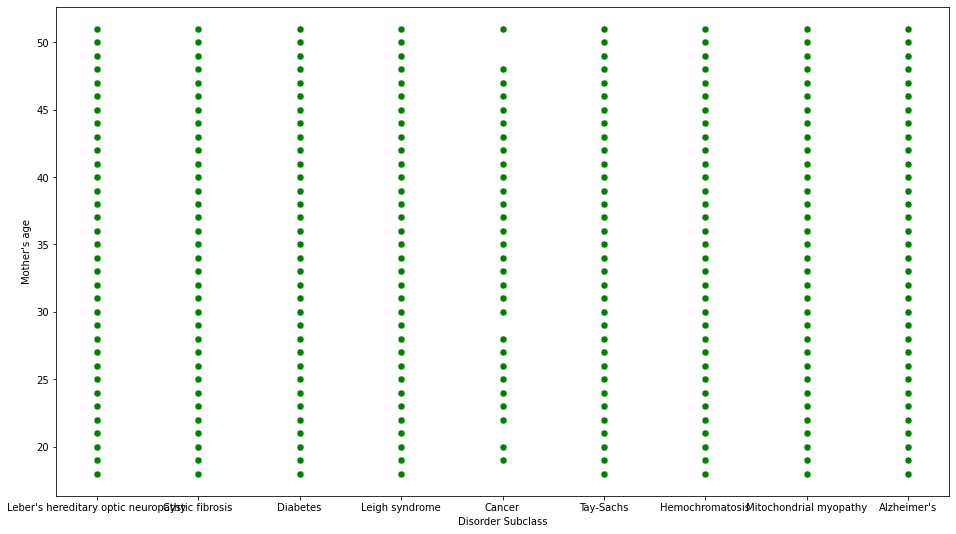

In [66]:
#plt.scatter(df2["Mother's age"],df2["Genetic Disorder"],marker='o', s=50, color='green')
plt.figure(figsize=(16, 9))
sns.scatterplot(df2["Disorder Subclass"],df2["Mother's age"],marker='o', s=50, color='green',)
plt.show()

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [49]:
type(df2['White Blood cell count (thousand per microliter)'])

pandas.core.series.Series

<BarContainer object of 22083 artists>

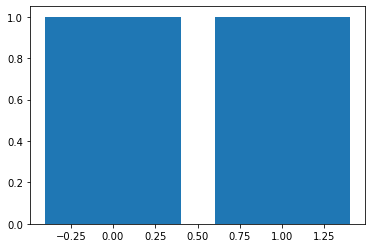

In [50]:
plt.bar(df2['Symptom 1'],df2['Symptom 2'])

In [51]:
plt.show()

In [41]:
df2["Mother's age"].isnull()

0         True
1         True
2        False
3        False
4        False
         ...  
22078     True
22079     True
22080     True
22081     True
22082     True
Name: Mother's age, Length: 22083, dtype: bool

C:\Users\subba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parental consent', ylabel="Mother's age">

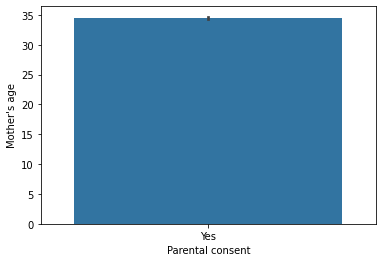

In [52]:
sns.barplot(df['Parental consent'],df2["Mother's age"])

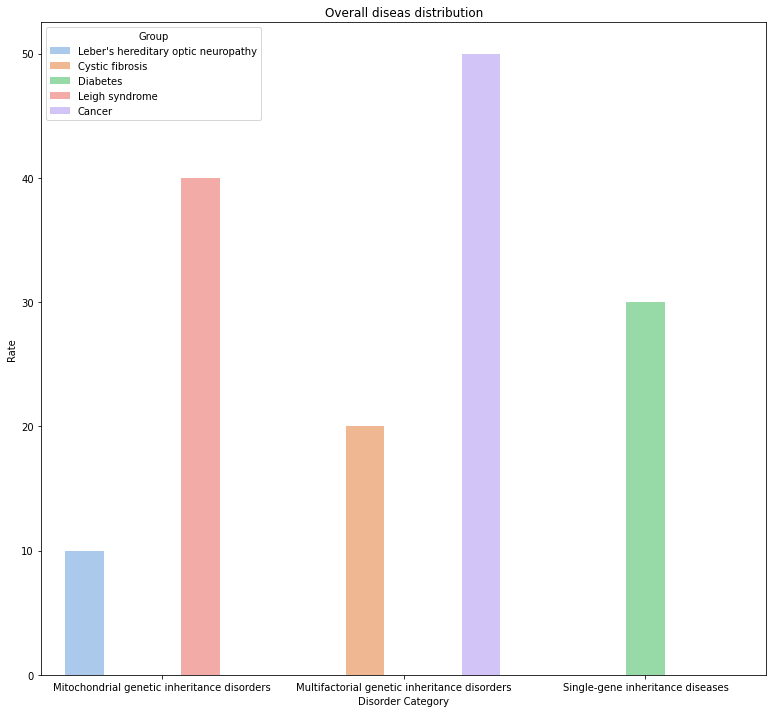

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['Mitochondrial genetic inheritance disorders', 'Multifactorial genetic inheritance disorders','Single-gene inheritance diseases','Mitochondrial genetic inheritance disorders','Multifactorial genetic inheritance disorders'],
        'Value': [10,20,30,40,50],
        'Group': ["Leber's hereditary optic neuropathy", 'Cystic fibrosis', 'Diabetes', 'Leigh syndrome', 'Cancer',]}
#df = pd.DataFrame(data)
df3=pd.DataFrame(data)
# Multiple bar graphs in a single plot using Seaborn
plt.figure(figsize=(13, 12))  # Adjust width and height as needed
sns.barplot(x='Category', y='Value', hue='Group', data=df3, palette='pastel')
plt.xlabel('Disorder Category')
plt.ylabel('Rate')
plt.title('Overall diseas distribution')
plt.show()

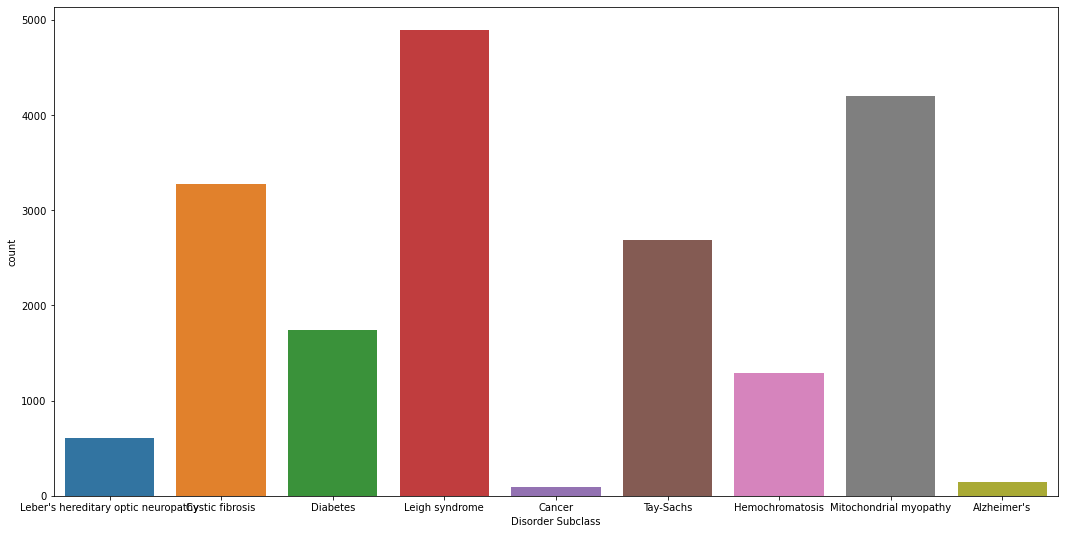

In [54]:
plt.figure(figsize=(18,9))
sns.countplot(x='Disorder Subclass',data=df2)
plt.show()

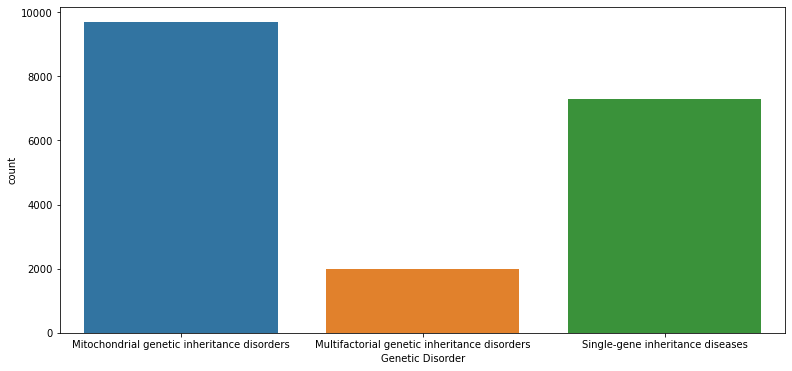

In [55]:
plt.figure(figsize=(13, 6))
sns.countplot(x='Genetic Disorder',data=df2)
plt.show()

In [56]:
df2['Status'].unique()

array(['Alive', 'Deceased', nan], dtype=object)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [58]:
df4=[['Symptom 1'],['Symptom 2'],['Symptom 3'],['Symptom 4']]

In [59]:
df4

[['Symptom 1'], ['Symptom 2'], ['Symptom 3'], ['Symptom 4']]

In [72]:
acuracy = 0.71

In [73]:
pd.factorize(df2['Institute Name'])

(array([ 0,  1, -1, ..., -1, -1, -1], dtype=int64),
 Index(['Boston Specialty & Rehabilitation Hospital',
        'St. Margaret's Hospital For Women', 'Carney Hospital',
        'Massachusetts General Hospital', 'Not applicable',
        'Lemuel Shattuck Hospital', 'Shriners Burns Institute',
        'New England Medical Center', 'Massachusetts Eye & Ear Infirmary',
        'VA Hospital', 'Dana-farber Cancer Institute',
        'Jewish Memorial Hospital',
        'Beth Israel Deaconess Medical Center West Cam', 'Children's Hospital',
        'Kindred Hospital', 'Boston Medical Center',
        'New England Baptist Hospital', 'Franciscan Children's  Hospital',
        'Beth Israel Deaconess Medical Center East Cam', 'Boston City Hospital',
        'Brigham And Women's Hospital', 'Arbour Hospital', 'Faulkner Hospital',
        'Hebrew Rehabilitation Center', 'St. Elizabeth's Hospital',
        'Va Hospital', 'Spaulding Rehabilitation Hospital'],
       dtype='object'))

In [62]:
plt.figure(figsize=(13, 6))
sns.barplot(df2['Family Name'],df2['Symptom 1'])
plt.show()

C:\Users\subba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

## DATA BALANCING 

,Genetic Disorder,Disorder Subclass
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,NaN,Cystic fibrosis
2,Multifactorial genetic inheritance disorders,Diabetes
3,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Multifactorial genetic inheritance disorders,Cancer
...,...,...
22078,NaN,NaN
22079,NaN,NaN
22080,NaN,NaN
22081,NaN,NaN


In [77]:
#MATERNAL GENE
value_counts = df3['Maternal gene'].value_counts()
proportions = value_counts / len(df3['Maternal gene'].dropna())
df3.loc[:, 'Maternal gene'] = df3.loc[:, 'Maternal gene'].fillna(method='ffill')

In [78]:
#GENES IN MOTHERS SIDE
value_counts = df3["Genes in mother's side"].value_counts()
proportions = value_counts / len(df3["Genes in mother's side"].dropna())
df3["Genes in mother's side"].fillna(method='ffill', inplace=True)

In [79]:
#parental gene
value_counts = df3["Paternal gene"].value_counts()
proportions = value_counts / len(df3["Paternal gene"].dropna())
df3["Paternal gene"].fillna(method='ffill', inplace=True)

In [80]:
#Inherited from father
value_counts = df3["Inherited from father"].value_counts()
proportions = value_counts / len(df3["Inherited from father"].dropna())
df3["Inherited from father"].fillna(method='ffill', inplace=True)

In [81]:
df3=df3[['Maternal gene',"Genes in mother's side","Paternal gene","Inherited from father","Genetic Disorder"]]

In [82]:
df3["Genetic Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [83]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Define the class names and their counts
class_counts = {
    'Mitochondrial genetic inheritance disorders': 9686,
    'Multifactorial genetic inheritance disorders': 7291,
    'Single-gene inheritance diseases': 1985
}

# Find the minimum count among the classes
min_class_count = min(class_counts.values())

# Create an empty DataFrame to store the balanced dataset
balanced_df = pd.DataFrame()

# Iterate through each class and randomly drop excess samples
for class_name, count in class_counts.items():
    class_subset = df3[df3['Genetic Disorder'] == class_name].sample(min_class_count, replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, class_subset])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the counts of each class in the balanced dataset
print(balanced_df['Genetic Disorder'].value_counts())

# Now, 'balanced_df' contains the balanced dataset

Multifactorial genetic inheritance disorders    1985
Mitochondrial genetic inheritance disorders     1985
Single-gene inheritance diseases                1985
Name: Genetic Disorder, dtype: int64


In [11]:
df3=balanced_df

In [12]:
df3["Genes in mother's side"] = df3["Genes in mother's side"].map({'Yes': 1, 'No': 0})
df3["Inherited from father"] = df3["Inherited from father"].map({'Yes': 1, 'No': 0})
df3["Maternal gene"] = df3["Maternal gene"].map({'Yes': 1, 'No': 0})
df3["Paternal gene"] = df3["Paternal gene"].map({'Yes': 1, 'No': 0})
df3["Genetic Disorder"]=df3["Genetic Disorder"].map({'Single-gene inheritance diseases':1,'Mitochondrial genetic inheritance disorders':2,'Multifactorial genetic inheritance disorders':0})

# MODEL TRAINING 

## LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature data and 'y' contains the corresponding labels
# Adjust column names based on your actual dataset
X = df3[["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene']]
y = df3['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed performance metrics
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.41
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48      1183
           1       0.38      0.52      0.44      1169
           2       0.38      0.23      0.29      1221

    accuracy                           0.41      3573
   macro avg       0.41      0.41      0.40      3573
weighted avg       0.41      0.41      0.40      3573



## DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature data and 'y' contains the corresponding labels
# Adjust column names based on your actual dataset
X = df3[["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene']]
y = df3['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed performance metrics
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.41
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.49      0.47      1183
           1       0.38      0.51      0.44      1169
           2       0.38      0.23      0.29      1221

    accuracy                           0.41      3573
   macro avg       0.41      0.41      0.40      3573
weighted avg       0.41      0.41      0.40      3573



## RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature data and 'y' contains the corresponding labels
# Adjust column names based on your actual dataset
X = df3[["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene']]
y = df3['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed performance metrics
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.41
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.49      0.47      1183
           1       0.38      0.51      0.44      1169
           2       0.38      0.23      0.29      1221

    accuracy                           0.41      3573
   macro avg       0.41      0.41      0.40      3573
weighted avg       0.41      0.41      0.40      3573



## KNN

In [13]:

# Assuming 'X' contains your feature data and 'y' contains the corresponding labels
# Adjust column names based on your actual dataset
X = df3[["Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene']]
y = df3['Genetic Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {acuracy:}")

Accuracy: 0.37


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43      1183
           1       0.35      0.42      0.38      1169
           2       0.35      0.25      0.29      1221

    accuracy                           0.37      3573
   macro avg       0.37      0.38      0.37      3573
weighted avg       0.37      0.37      0.37      3573



## TEST CASE

In [54]:
print("\nReports after diagnostics")

a,b,c,d=map(int,input().split(","))

new_data_point = [[a,b,c,d]]

predictions = knn_model.predict(new_data_point)


Reports after diagnostics
1,0,1,0


In [55]:
if predictions == [0]:
    print("Mitochondrial genetic inheritance disorders")
    
elif predictions == [1]:
    print("Single-gene inheritance diseases")
    
elif predictions == [2]:
    print("Multifactorial genetic inheritance disorders")
    
else:
    print("ooops")

Single-gene inheritance diseases


In [56]:
print("\nGiven Input: \n")


if a==1:
    print("Mother's side genes: Yes")
else:
    print("Mother's side genes: No")
    
if b==1:
    print("Father's side genes: Yes")
else:
    print("Father's side genes: No")
    
if c==1:
    print("Peternal genes: Yes")
else:
    print("Peternal genes: No")

if d==1:
    print("Meternal genes: Yes")
else:
    print("Meternal genes: No")


#print(a,b,c,d)

print("\nPredicted Result is:")
if predictions == [0]:
    print("Mitochondrial genetic inheritance disorders")
    
elif predictions == [1]:
    print("Single-gene inheritance diseases")
    
elif predictions == [2]:
    print("Multifactorial genetic inheritance disorders")
    
else:
    print("ooops")
    
print(predictions)


Given Input: 

Mother's side genes: Yes
Father's side genes: No
Peternal genes: Yes
Meternal genes: No

Predicted Result is:
Single-gene inheritance diseases
[1]
